In [0]:
from google.colab import files
file=files.upload()

Saving kaggle.json to kaggle.json


In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets list

ref                                                      title                                               size  lastUpdated          downloadCount  
-------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
rajeevw/ufcdata                                          UFC-Fight historical data from 1993 to 2019          3MB  2019-07-05 09:58:02           7940  
gustavomodelli/forest-fires-in-brazil                    Forest Fires in Brazil                              31KB  2019-08-24 16:09:16          13768  
chirin/africa-economic-banking-and-systemic-crisis-data  Africa Economic, Banking and Systemic Crisis Data   14KB  2019-07-21 02:00:17           4716  
shuyangli94/food-com-recipes-and-user-interactions       Food.com Recipes and Interactions                  267MB  2019-11-08 01:18:21           4114  
ruslankl/european-union-lgbt-survey-2012                 EU LGBT Survey                 

In [0]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2405           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      15196           False  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       5257           False  
imagenet-object-localization-challenge         2029-12-31 07:00:00  Research         Knowledge         57           False  
tensorflow2-question-answering                 2020-01-22 23:59:00  Featured           $50,000        485           False  
data-science-bowl-2019                         2020-01-22 23:59:00  Featured          $160,000        884           False  
pku-auto

In [0]:
!kaggle competitions download -c ashrae-energy-prediction

 98% 163M/167M [00:01<00:00, 131MB/s]
100% 167M/167M [00:01<00:00, 138MB/s]
 86% 76.0M/88.4M [00:00<00:00, 130MB/s]
100% 88.4M/88.4M [00:00<00:00, 164MB/s]
 94% 113M/120M [00:01<00:00, 106MB/s]  
100% 120M/120M [00:01<00:00, 118MB/s]
  0% 0.00/44.5k [00:00<?, ?B/s]
100% 44.5k/44.5k [00:00<00:00, 45.0MB/s]
  0% 0.00/2.53M [00:00<?, ?B/s]
100% 2.53M/2.53M [00:00<00:00, 83.6MB/s]
  0% 0.00/1.27M [00:00<?, ?B/s]
100% 1.27M/1.27M [00:00<00:00, 185MB/s]


In [0]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')
import gc
%matplotlib inline
import random
import math

In [0]:
train=pd.read_csv('/content/train.csv.zip',compression='zip',header=0,sep=',',quotechar='"')
weather_train=pd.read_csv('/content/weather_train.csv.zip',compression='zip',header=0,sep=',',quotechar='"')
test=pd.read_csv('/content/test.csv.zip',compression='zip',header=0,sep=',',quotechar='"')
weather_test=pd.read_csv('/content/weather_test.csv.zip',compression='zip',header=0,sep=',',quotechar='"')
sample=pd.read_csv('/content/sample_submission.csv.zip',compression='zip',header=0,sep=',',quotechar='"')
build_M_D=pd.read_csv('/content/building_metadata.csv')

In [0]:
train["timestamp"] = pd.to_datetime(train["timestamp"], format='%Y-%m-%d %H:%M:%S')

In [0]:
train.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01,0.0
1,1,0,2016-01-01,0.0
2,2,0,2016-01-01,0.0
3,3,0,2016-01-01,0.0
4,4,0,2016-01-01,0.0


In [0]:
test.head()

,row_id,building_id,meter,timestamp
0,0,0,0,2017-01-01 00:00:00
1,1,1,0,2017-01-01 00:00:00
2,2,2,0,2017-01-01 00:00:00
3,3,3,0,2017-01-01 00:00:00
4,4,4,0,2017-01-01 00:00:00


In [0]:
weather_train.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [0]:
build_M_D.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


size of data

In [0]:
print('size of training set :',train.shape)
print('size of test set :',test.shape)
print('size of weather_train :',weather_train.shape)
print('size of weather_test :',weather_test.shape)
print('size of Building_Meta_Data :',build_M_D.shape)

size of training set : (20216100, 4)
size of test set : (41697600, 4)
size of weather_train : (139773, 9)
size of weather_test : (277243, 9)
size of Building_Meta_Data : (1449, 6)


Reduce the memory size:

In [0]:
#Function to reduce memory size
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [0]:
#Reduce memory
train = reduce_mem_usage(train)
test = reduce_mem_usage(test)
weather_train = reduce_mem_usage(weather_train)
weather_test = reduce_mem_usage(weather_test)
build_M_D = reduce_mem_usage(build_M_D)

Mem. usage decreased to 289.19 Mb (53.1% reduction)
Mem. usage decreased to 596.49 Mb (53.1% reduction)
Mem. usage decreased to  3.07 Mb (68.1% reduction)
Mem. usage decreased to  6.08 Mb (68.1% reduction)
Mem. usage decreased to  0.03 Mb (60.3% reduction)


In [0]:
train.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01,0.0
1,1,0,2016-01-01,0.0
2,2,0,2016-01-01,0.0
3,3,0,2016-01-01,0.0
4,4,0,2016-01-01,0.0


In [0]:
train.columns.values

array(['building_id', 'meter', 'timestamp', 'meter_reading'], dtype=object)

In [0]:
weather_train.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.000000,6.0,20.00000,NaN,1019.5,0.0,0.000000
1,0,2016-01-01 01:00:00,24.406250,NaN,21.09375,-1.0,1020.0,70.0,1.500000
2,0,2016-01-01 02:00:00,22.796875,2.0,21.09375,0.0,1020.0,0.0,0.000000
3,0,2016-01-01 03:00:00,21.093750,2.0,20.59375,0.0,1020.0,0.0,0.000000
4,0,2016-01-01 04:00:00,20.000000,2.0,20.00000,-1.0,1020.0,250.0,2.599609


In [0]:
weather_train.columns.values

array(['site_id', 'timestamp', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed'], dtype=object)

In [0]:
weather_test.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2017-01-01 00:00:00,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
1,0,2017-01-01 01:00:00,17.796875,2.0,12.796875,0.0,1022.0,130.0,3.099609
2,0,2017-01-01 02:00:00,16.093750,0.0,12.796875,0.0,1022.0,140.0,3.099609
3,0,2017-01-01 03:00:00,17.203125,0.0,13.296875,0.0,1022.0,140.0,3.099609
4,0,2017-01-01 04:00:00,16.703125,2.0,13.296875,0.0,1022.5,130.0,2.599609


In [0]:
weather_test.columns.values

array(['site_id', 'timestamp', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed'], dtype=object)

In [0]:
build_M_D.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [0]:
build_M_D.columns.values

array(['site_id', 'building_id', 'primary_use', 'square_feet',
       'year_built', 'floor_count'], dtype=object)

#Exploratory Data Analysis

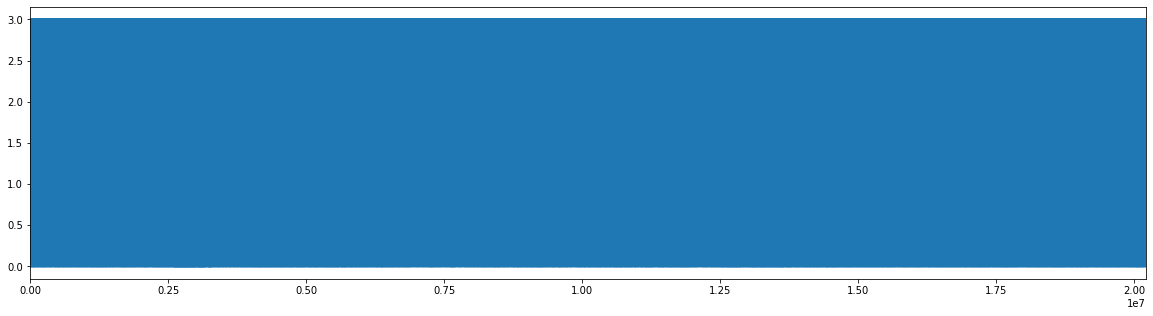

In [0]:
for key, d in train.groupby('meter_reading'):
       break
       d.head()
plt.figure(figsize=(20,5))
d['meter'].plot()

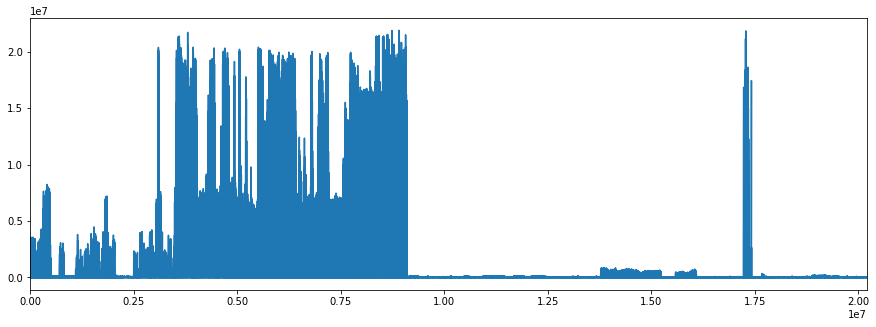

In [0]:
plt.figure(figsize = (15,5))

train['meter_reading'].plot()

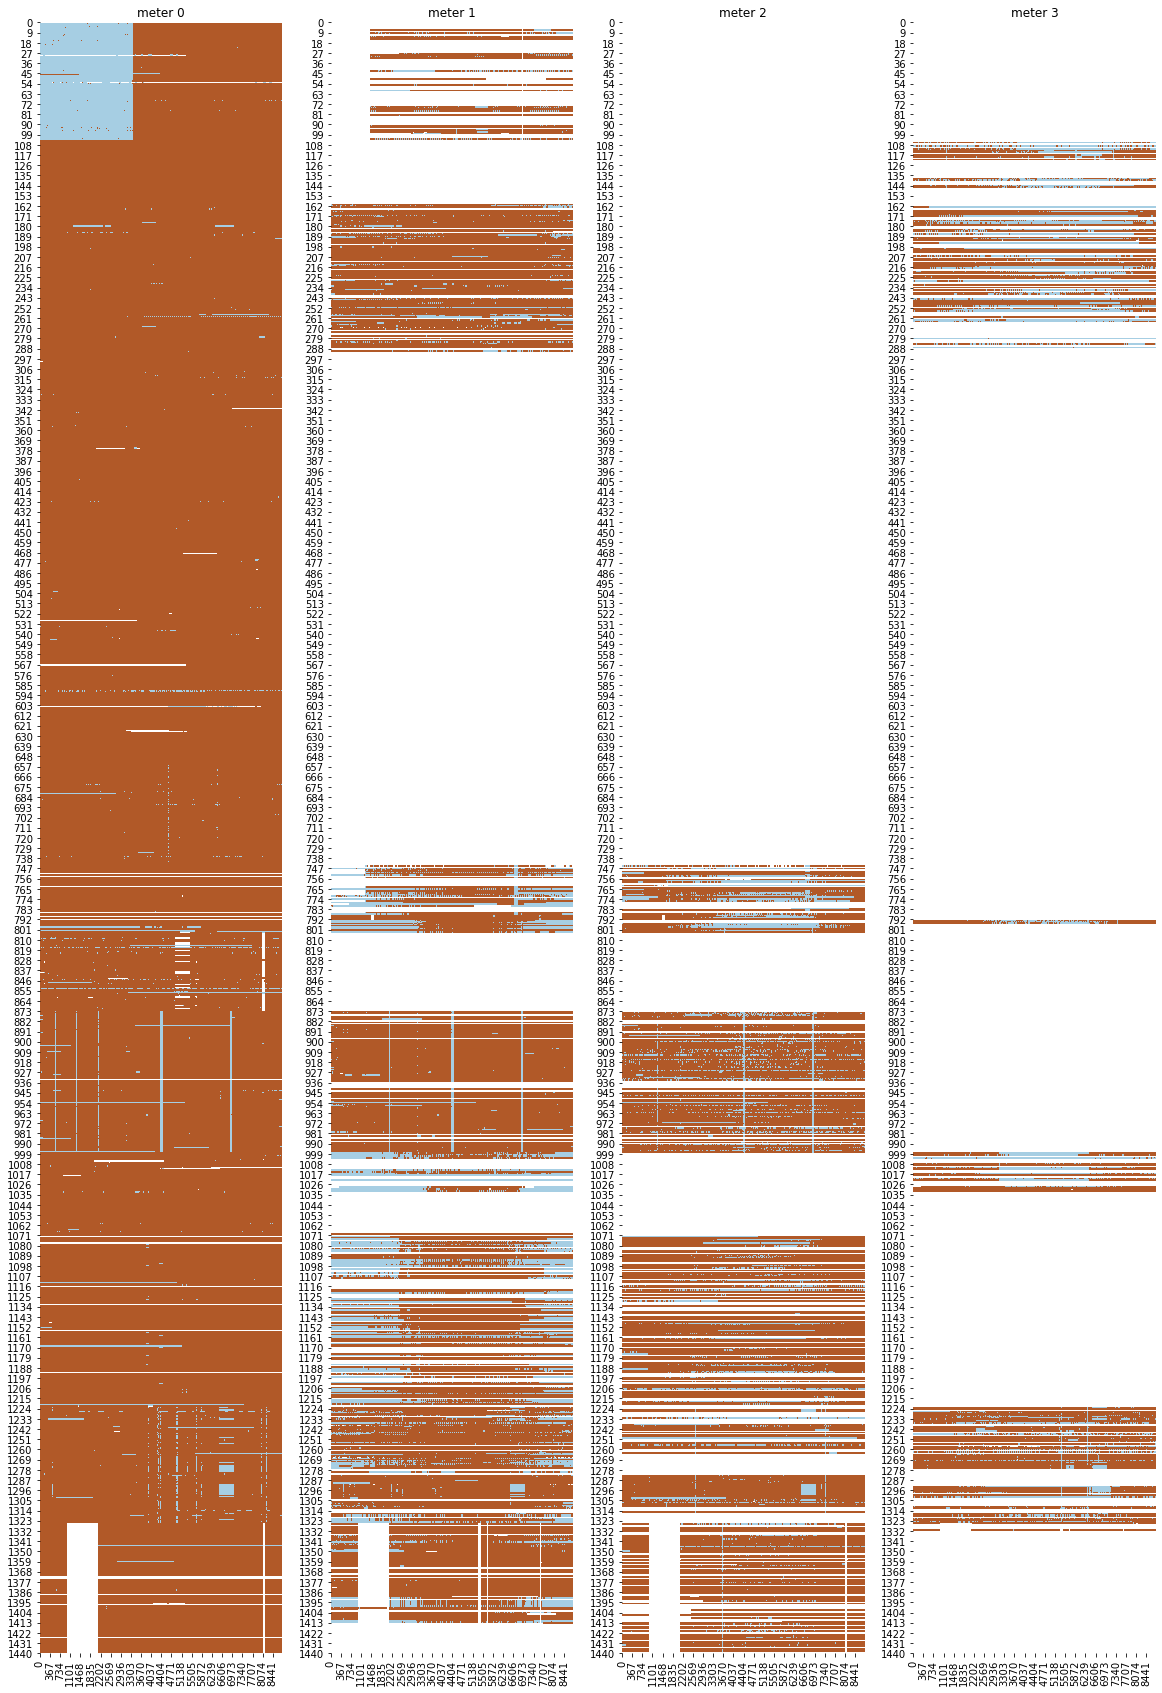

In [0]:
#Load Data
train_df = train.set_index(['timestamp'])
# Plot missing values per building/meter  
f,a=plt.subplots(1,4,figsize=(20,30))
for meter in np.arange(4):
  df = train_df[train_df.meter==meter].copy().reset_index()
  df['timestamp'] = pd.to_timedelta(df.timestamp).dt.total_seconds() / 3600
  df['timestamp'] = df.timestamp.astype(int)
  
  df.timestamp -= df.timestamp.min()


  missmap = np.empty((1449, df.timestamp.max()+1))
  missmap.fill(np.nan)
  for l in df.values:
        if l[2]!=meter:continue
        missmap[int(l[1]), int(l[0])] = 0 if l[3]==0 else 1
  a[meter].set_title(f'meter {meter:d}')
  sns.heatmap(missmap, cmap='Paired', ax=a[meter], cbar=False)

Legend:

*   X axis: hours elapsed since Jan 1st 2016, for each of the 4 meter types

*   Y axis: building_id

*   Brown: meter reading available with non-zero value

*   Light blue: meter reading available with zero value

*   White: missing meter reading








#Checking Missing Values

In [0]:
#checking missing data for train
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False)
missing__train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing__train_data 

,Total,Percent
meter_reading,0,0.0
timestamp,0,0.0
meter,0,0.0
building_id,0,0.0


checking missing data for weather_train:

In [0]:
#checking missing data for weather_train
total=weather_train.isnull().sum().sort_values(ascending=False)
percent=(weather_train.isnull().sum()/weather_train.isnull().count()*100).sort_values(ascending=False)
missing_weather_data=pd.concat([total,percent],axis=1,keys=['Total','percent'])
missing_weather_data.head()

,Total,percent
cloud_coverage,69173,49.489529
precip_depth_1_hr,50289,35.979052
sea_level_pressure,10618,7.596603
wind_direction,6268,4.484414
wind_speed,304,0.217496


In [0]:
#checking missing data for weather_test
total=weather_test.isnull().sum().sort_values(ascending=False)
percent=(weather_test.isnull().sum()/weather_test.isnull().count()*100).sort_values(ascending=False)
missing_weather_test=pd.concat([total,percent],axis=1,keys=['Total','percent'])
missing_weather_test.head()

,Total,percent
cloud_coverage,140448,50.658808
precip_depth_1_hr,95588,34.478057
sea_level_pressure,21265,7.670167
wind_direction,12370,4.461790
wind_speed,460,0.165919


In [0]:
#checking missing data for building_meta_data
total = build_M_D.isnull().sum().sort_values(ascending = False)
percent = (build_M_D.isnull().sum()/build_M_D.isnull().count()*100).sort_values(ascending = False)
missing_building_meta  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_building_meta.head(6)

,Total,Percent
floor_count,1094,75.500345
year_built,774,53.416149
square_feet,0,0.000000
primary_use,0,0.000000
building_id,0,0.000000
site_id,0,0.000000


##column type

In [0]:
#number of each type of column
train.dtypes.value_counts()

int8              1
int16             1
datetime64[ns]    1
float32           1
dtype: int64

##Correlation

In [0]:
# Find correlations with the target and sort
correlations = train.corr()['meter_reading'].sort_values()
correlations

building_id      0.008761
meter            0.017672
meter_reading    1.000000
Name: meter_reading, dtype: float64

In [0]:
corrs=train.corr()
corrs

,building_id,meter,meter_reading
building_id,1.000000,0.222268,0.008761
meter,0.222268,1.000000,0.017672
meter_reading,0.008761,0.017672,1.000000


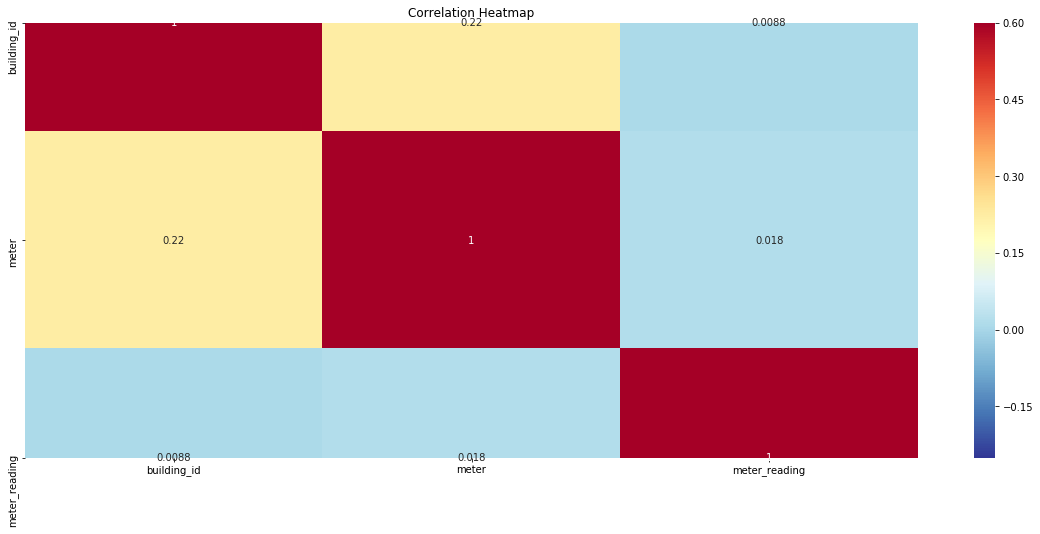

In [0]:
plt.figure(figsize = (20, 8))

# Heatmap of correlations
sns.heatmap(corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

#plotting

In [0]:
train.building_id.nunique()

1449

In [0]:
def plot_dist_col(column):
    '''plot dist curves for train and test weather data for the given column name'''
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.distplot(weather_train[column].dropna(), color='green', ax=ax).set_title(column, fontsize=16)
    sns.distplot(weather_test[column].dropna(), color='purple', ax=ax).set_title(column, fontsize=16)
    plt.xlabel(column, fontsize=15)
    plt.legend(['train', 'test'])
    plt.show()

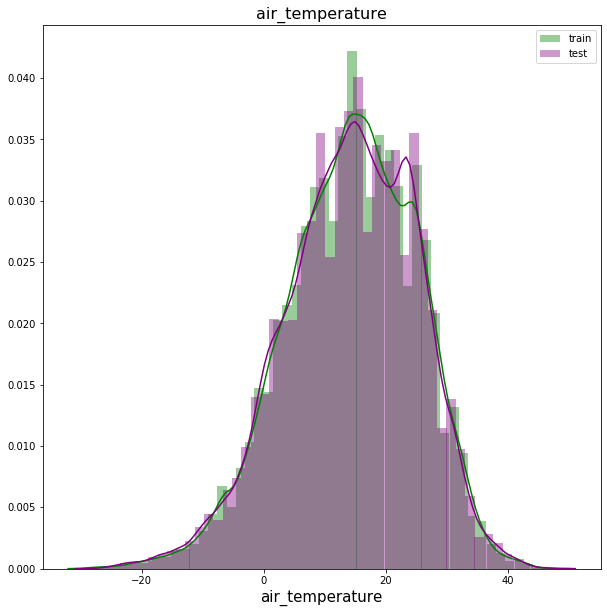

In [0]:
#plot dist. curves for air_temperature
plot_dist_col('air_temperature')

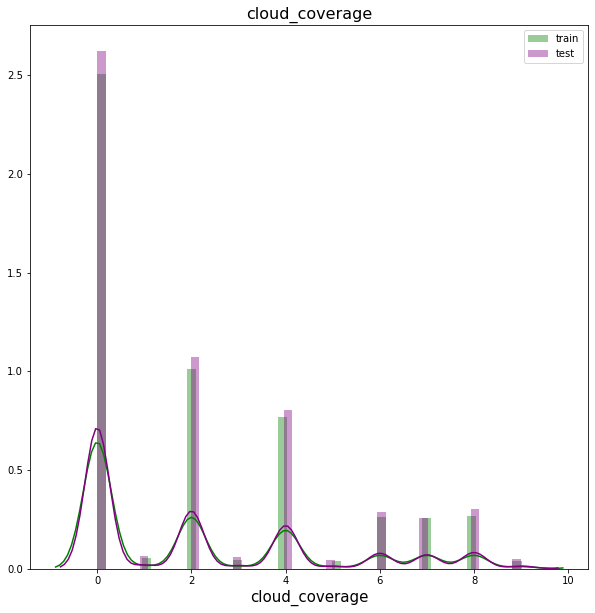

In [0]:
#plot dist. curves  for cloud_coverage

plot_dist_col('cloud_coverage')

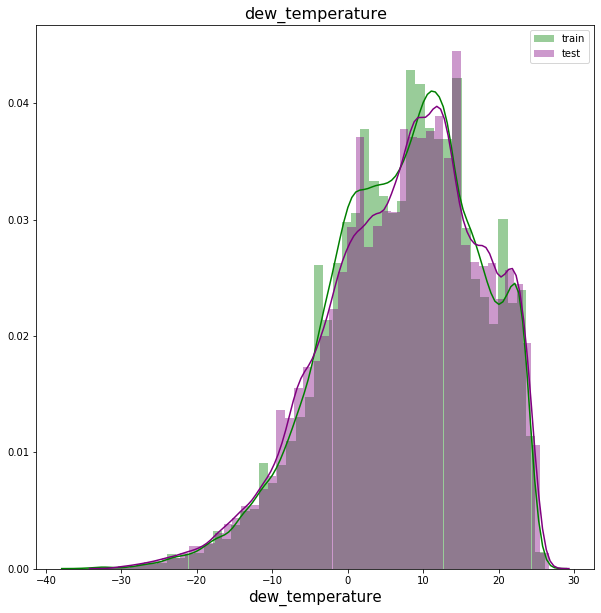

In [0]:
#plot dist. curves  for dew_temperature

plot_dist_col('dew_temperature')

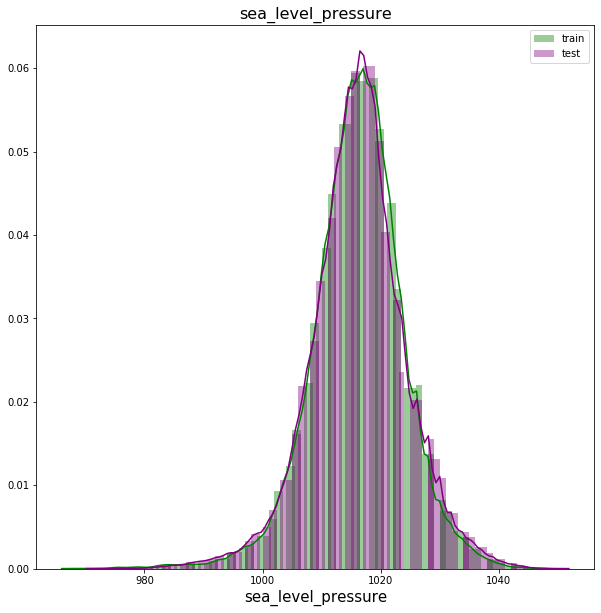

In [0]:
#plot dist. curves for sea_level_pressure


plot_dist_col('sea_level_pressure')

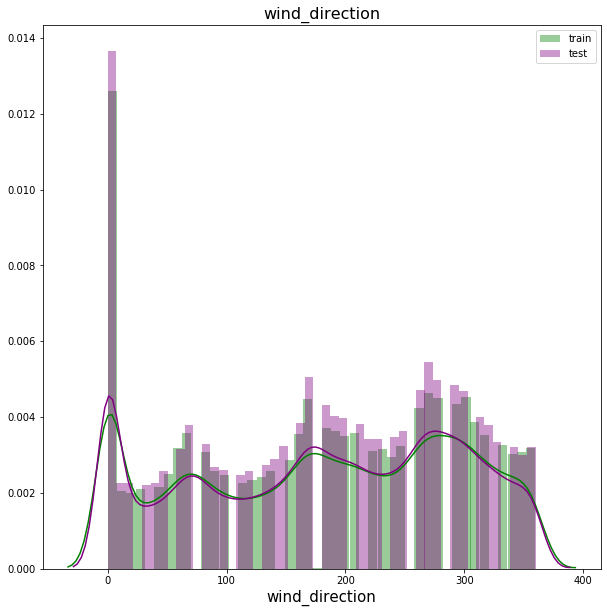

In [0]:
#pplot dist. curve for wind_direction

plot_dist_col('wind_direction')

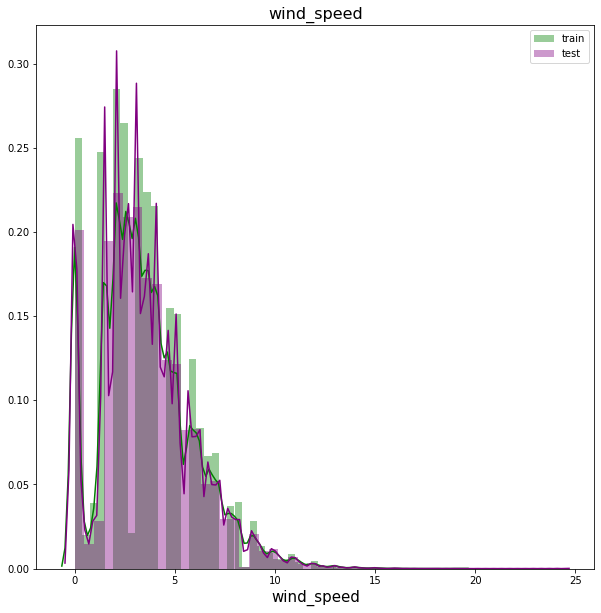

In [0]:
#plot dist. curve for wind_speed
plot_dist_col('wind_speed')

Simple single series

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose

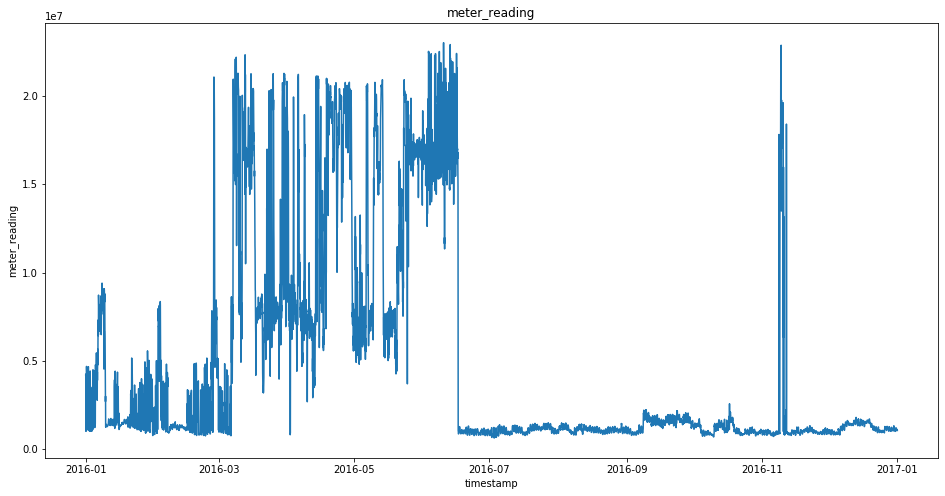

In [0]:
ts=train.groupby(["timestamp"])["meter_reading"].sum()
ts.astype('float')
plt.figure(figsize=(16,8))
plt.title('meter_reading')
plt.xlabel('timestamp')
plt.ylabel('meter_reading')
plt.plot(ts);

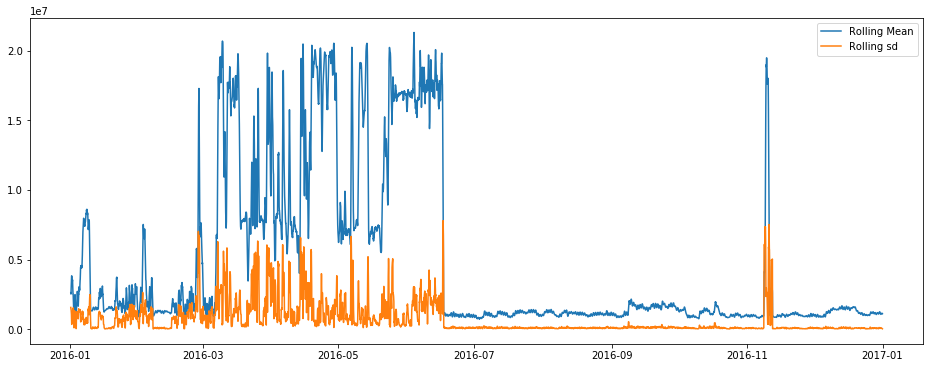

In [0]:
plt.figure(figsize=(16,6))
plt.plot(ts.rolling(window=12,center=False).mean(),label='Rolling Mean'); 
plt.plot(ts.rolling(window=12,center=False).std(),label='Rolling sd');
plt.legend();

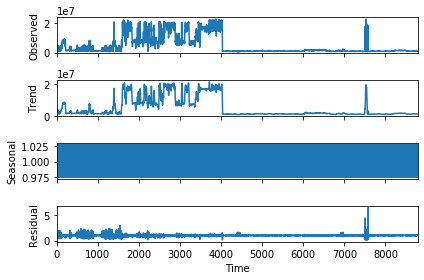

In [0]:
 import statsmodels.api as sm
# multiplicative 
res = sm.tsa.seasonal_decompose(ts.values,freq=12,model="multiplicative")
fig = res.plot()

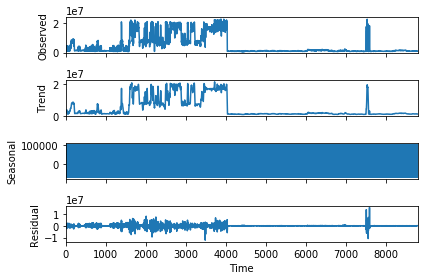

In [0]:
# Additive model
res = sm.tsa.seasonal_decompose(ts.values,freq=12,model="additive")
fig = res.plot()


#Outlier distribution

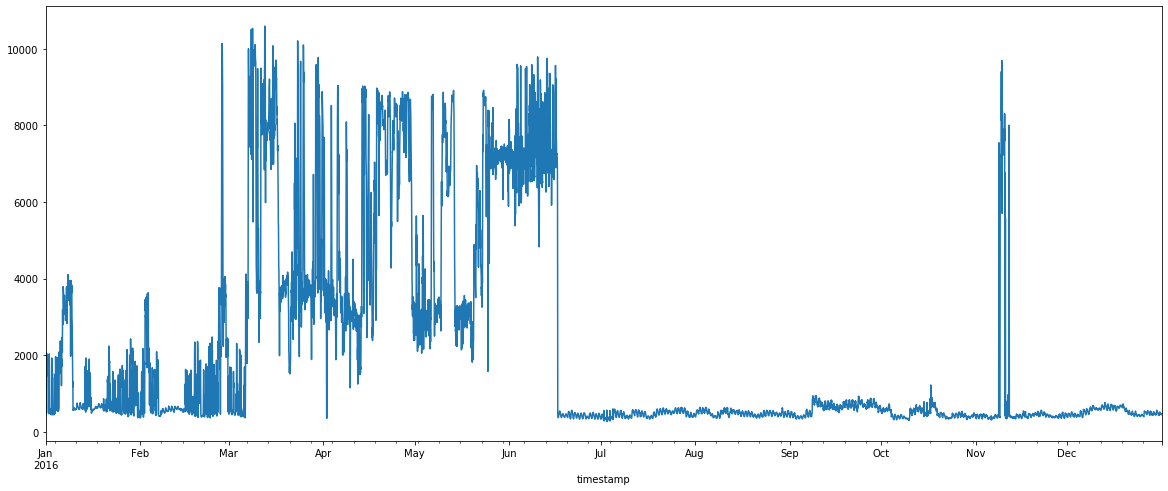

In [0]:
y_mean_time = train.groupby('timestamp').meter_reading.mean()
y_mean_time.plot(figsize=(20, 8))

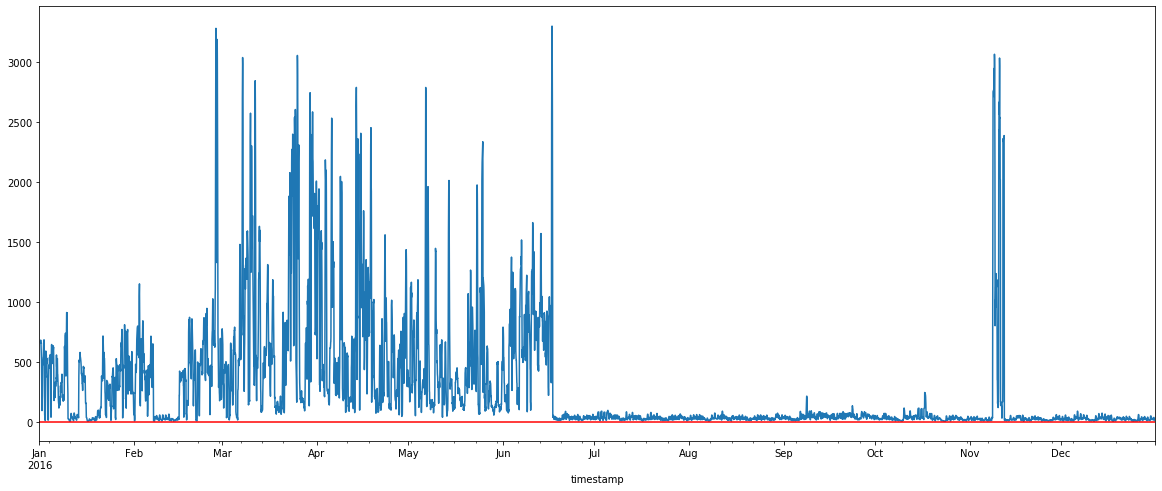

In [0]:
y_mean_time.rolling(window=10).std().plot(figsize=(20, 8))
ax = plt.axhline(y=0.009, color='red')

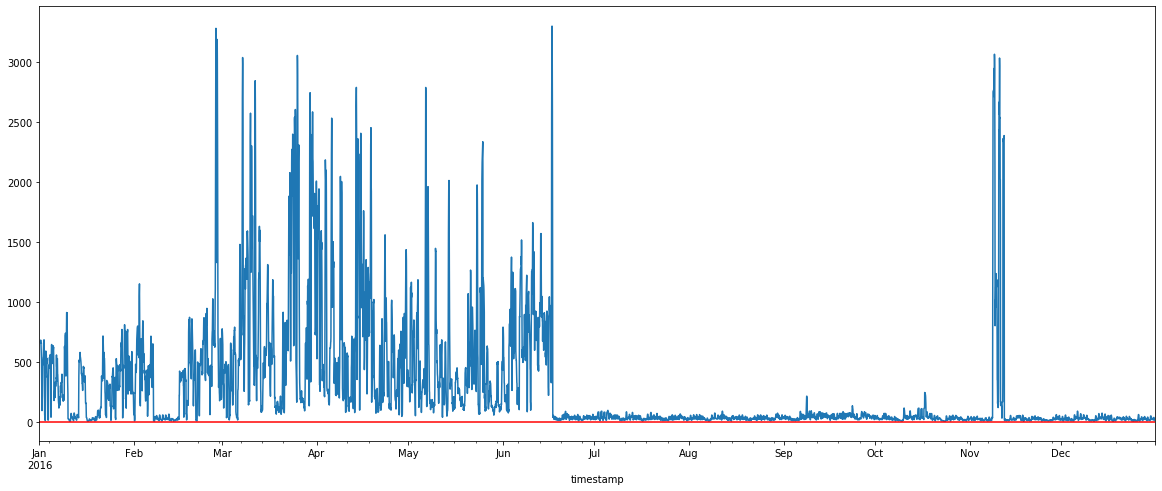

In [0]:
y_mean_time.rolling(window=10).std().plot(figsize=(20, 8))
plt.axhline(y=0.009, color='red')
plt.axvspan(0, 905, color='green', alpha=0.1)
plt.axvspan(906, 1505, color='red', alpha=0.1)

##Group data in a daily basis

In [0]:
train.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01,0.0
1,1,0,2016-01-01,0.0
2,2,0,2016-01-01,0.0
3,3,0,2016-01-01,0.0
4,4,0,2016-01-01,0.0


In [0]:
train['meter'] = pd.Categorical(train['meter']).rename_categories({0: 'electricity', 1: 'chilledwater', 2: 'steam', 3: 'hotwater'})
test['meter'] = pd.Categorical(test['meter']).rename_categories({0: 'electricity', 1: 'chilledwater', 2: 'steam', 3: 'hotwater'}) # encode the test data also so that it will not create confusion
daily_train = train.copy()
daily_train['date'] = daily_train['timestamp'].dt.date
daily_train = daily_train.groupby(['date', 'building_id', 'meter']).sum()
daily_train

meter_reading
date       building_id meter                      
2016-01-01 0           electricity        0.000000
                       chilledwater            NaN
                       steam                   NaN
                       hotwater                NaN
           1           electricity        0.000000
...                                            ...
2016-12-31 1447        hotwater                NaN
           1448        electricity       79.974998
                       chilledwater            NaN
                       steam                   NaN
                       hotwater                NaN

[2121336 rows x 1 columns]

In [0]:
daily_train_agg = daily_train.groupby(['date', 'meter']).agg(['sum', 'mean', 'idxmax', 'max'])
daily_train_agg = daily_train_agg.reset_index()
level_0 = daily_train_agg.columns.droplevel(0)
level_1 = daily_train_agg.columns.droplevel(1)
level_0 = ['' if x == '' else '-' + x for x in level_0]
daily_train_agg.columns = level_1 + level_0
daily_train_agg.rename_axis(None, axis=1)
daily_train_agg.head()

,date,meter,meter_reading-sum,meter_reading-mean,meter_reading-idxmax,meter_reading-max
0,2016-01-01,electricity,4.219648e+06,3037.903076,"(2016-01-01, 803, electricity)",1.160372e+05
1,2016-01-01,chilledwater,1.412169e+06,3090.084961,"(2016-01-01, 1289, chilledwater)",1.042116e+05
2,2016-01-01,steam,6.873201e+07,218891.734375,"(2016-01-01, 1099, steam)",5.095080e+07
3,2016-01-01,hotwater,1.609989e+06,11180.481445,"(2016-01-01, 1331, hotwater)",2.198245e+05
4,2016-01-02,electricity,4.288951e+06,3085.576416,"(2016-01-02, 803, electricity)",1.157768e+05


In [0]:
fig_total = px.line(daily_train_agg, x='date', y='meter_reading-sum', color='meter', render_mode='svg')
fig_total.update_layout(title='Total kWh per energy aspect')
fig_total.show()

In [0]:
fig_maximum = px.line(daily_train_agg, x='date', y='meter_reading-max', color='meter', render_mode='svg')
fig_maximum.update_layout(title='Maximum kWh value per energy aspect')
fig_maximum.show()

##Outlier Identification

In [0]:
daily_train_agg['building_id_max'] = [x[1] for x in daily_train_agg['meter_reading-idxmax']]
daily_train_agg.head()

,date,meter,meter_reading-sum,meter_reading-mean,meter_reading-idxmax,meter_reading-max,building_id_max
0,2016-01-01,electricity,4.219648e+06,3037.903076,"(2016-01-01, 803, electricity)",1.160372e+05,803
1,2016-01-01,chilledwater,1.412169e+06,3090.084961,"(2016-01-01, 1289, chilledwater)",1.042116e+05,1289
2,2016-01-01,steam,6.873201e+07,218891.734375,"(2016-01-01, 1099, steam)",5.095080e+07,1099
3,2016-01-01,hotwater,1.609989e+06,11180.481445,"(2016-01-01, 1331, hotwater)",2.198245e+05,1331
4,2016-01-02,electricity,4.288951e+06,3085.576416,"(2016-01-02, 803, electricity)",1.157768e+05,803


In [0]:
def show_building(building, energy_aspects=None):
    fig = px.line(daily_train.loc[(slice(None), building, slice(None)), :].reset_index(),
                  x='date',
                  y='meter_reading',
                  color='meter',
                  render_mode='svg')
    if energy_aspects:
        if 'electricity' not in energy_aspects:
            fig['data'][0].visible = 'legendonly'
        if 'chilledwater' not in energy_aspects:
            fig['data'][1].visible = 'legendonly'
        if 'steam' not in energy_aspects:
            fig['data'][2].visible = 'legendonly'
        if 'hotwater' not in energy_aspects:
            fig['data'][3].visible = 'legendonly'
    fig.update_layout(title='Building ID: {}'.format(building))        
    fig.show()
    display(building_metadata[building_metadata['building_id']==building])

electricity

In [0]:
print('Number of days that a building has the maximum electricity consumption of all the buildings:\n')
print(daily_train_agg[daily_train_agg['meter'] == 'electricity']['building_id_max'].value_counts())

Number of days that a building has the maximum electricity consumption of all the buildings:

803     192
801      65
799      58
1088     49
993       1
794       1
Name: building_id_max, dtype: int64


In [0]:
daily_train_electricity = daily_train_agg[daily_train_agg['meter']=='electricity'].copy()
daily_train_electricity['building_id_max'] = pd.Categorical(daily_train_electricity['building_id_max'])
fig_daily_electricity = px.scatter(daily_train_electricity,
                                   x='date',
                                   y='meter_reading-max',
                                   color='building_id_max',
                                   render_mode='svg')
fig_daily_electricity.update_layout(title='Maximum consumption values for the day and energy aspect')
fig_daily_electricity.show()

##Chilled Water

In [0]:
print('Number of days that a building has the maximum chilledwater consumption of all the buildings:\n')
print(daily_train_agg[daily_train_agg['meter'] == 'chilledwater']['building_id_max'].value_counts())

Number of days that a building has the maximum chilledwater consumption of all the buildings:

1284    134
76       92
1258     41
1289     38
778      37
1088     10
29       10
1156      2
60        1
50        1
Name: building_id_max, dtype: int64


In [0]:
daily_train_chilledwater = daily_train_agg[daily_train_agg['meter']=='chilledwater'].copy()
daily_train_chilledwater['building_id_max'] = pd.Categorical(daily_train_chilledwater['building_id_max'])
fig_daily_chilledwater = px.scatter(daily_train_chilledwater,
                                    x='date',
                                    y='meter_reading-max',  
                                    color='building_id_max', 
                                    render_mode='svg')
fig_daily_chilledwater.update_layout(title='Maximum consumption values for the day and energy aspect')
fig_daily_chilledwater.show()

##Steam

In [0]:
print('Number of days that a building has the maximum steam consumption of all the buildings:\n')
print(daily_train_agg[daily_train_agg['meter'] == 'steam']['building_id_max'].value_counts())

Number of days that a building has the maximum steam consumption of all the buildings:

1099    158
1197    101
1168    100
1148      7
Name: building_id_max, dtype: int64


In [0]:
daily_train_steam = daily_train_agg[daily_train_agg['meter']=='steam'].copy()
daily_train_steam['building_id_max'] = pd.Categorical(daily_train_steam['building_id_max'])
fig_daily_steam = px.scatter(daily_train_steam,
                             x='date',
                             y='meter_reading-max',
                             color='building_id_max',
                             render_mode='svg')
fig_daily_steam.update_layout(title='Maximum consumption values for the day and energy aspect')
fig_daily_steam.show()

##Hotwater

In [0]:
print('Number of days that a building has the maximum hotwater consumption of all the buildings:\n')
print(daily_train_agg[daily_train_agg['meter'] == 'hotwater']['building_id_max'].value_counts())

Number of days that a building has the maximum hotwater consumption of all the buildings:

1021    229
1331    120
1317      7
794       7
1323      1
1252      1
1232      1
Name: building_id_max, dtype: int64


In [0]:
daily_train_hotwater = daily_train_agg[daily_train_agg['meter']=='hotwater'].copy()
daily_train_hotwater['building_id_max'] = pd.Categorical(daily_train_hotwater['building_id_max'])
fig_daily_hotwater = px.scatter(daily_train_hotwater,
                                x='date',
                                y='meter_reading-max',
                                color='building_id_max',
                                render_mode='svg')
fig_daily_hotwater.update_layout(title='Maximum consumption values for the day and energy aspect')
fig_daily_hotwater.show()

#Simple Feature Engineering

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [0]:
train['timestamp'] = pd.to_datetime(train['timestamp'])
test['timestamp'] = pd.to_datetime(test['timestamp'])
weather_train['timestamp'] = pd.to_datetime(weather_train['timestamp'])
weather_test['timestamp'] = pd.to_datetime(weather_test['timestamp'])
    
build_M_D['primary_use'] = build_M_D['primary_use'].astype('category')

In [0]:
1....# train = train.merge(building, on='building_id', how='left')
# test = test.merge(building, on='building_id', how='left')

# train = train.merge(weather_train, on=['site_id', 'timestamp'], how='left')
# test = test.merge(weather_test, on=['site_id', 'timestamp'], how='left')
# del weather_train, weather_test,building
# gc.collect();

Building DF merge

In [0]:
temp_df = train[['building_id']]
temp_df = temp_df.merge(build_M_D, on=['building_id'], how='left')
del temp_df['building_id']
train = pd.concat([train, temp_df], axis=1)

temp_df = test[['building_id']]
temp_df = temp_df.merge(build_M_D, on=['building_id'], how='left')

del temp_df['building_id']
test = pd.concat([test, temp_df], axis=1)
del temp_df, build_M_D

weather df merge

In [0]:
temp_df = train[['site_id','timestamp']]
temp_df = temp_df.merge(weather_train, on=['site_id','timestamp'], how='left')
del temp_df['site_id'], temp_df['timestamp']
train = pd.concat([train, temp_df], axis=1)
temp_df = test[['site_id','timestamp']]
temp_df = temp_df.merge(weather_test, on=['site_id','timestamp'], how='left')
del temp_df['site_id'], temp_df['timestamp']
test = pd.concat([test, temp_df], axis=1)

del temp_df, weather_train, weather_test

Data minification

In [0]:
train.to_pickle('train.pkl')
test.to_pickle('test.pkl')
del train,test
gc.collect()

In [0]:
train=pd.read_pickle('train.pkl')
test=pd.read_pickle('test.pkl')

In [0]:
train['age']=train['year_built'].max()-train['year_built']+1
test['age']=test['year_built'].max()-test['year_built']+1

##label encoder

In [0]:
le=LabelEncoder()

In [0]:
#encoding of 'primary_use' variable
train['primary_use']=le.fit_transform(train['primary_use']).astype(np.int8)
test['primary_use']=le.fit_transform(test['primary_use']).astype(np.int8)

In [0]:
train['floor_count'] = train['floor_count'].fillna(-999).astype(np.int16)
test['floor_count'] = test['floor_count'].fillna(-999).astype(np.int16)

train['year_built'] = train['year_built'].fillna(-999).astype(np.int16)
test['year_built'] = test['year_built'].fillna(-999).astype(np.int16)

train['age'] = train['age'].fillna(-999).astype(np.int16)
test['age'] = test['age'].fillna(-999).astype(np.int16)

train['cloud_coverage'] = train['cloud_coverage'].fillna(-999).astype(np.int16)
test['cloud_coverage'] = test['cloud_coverage'].fillna(-999).astype(np.int16)

In [0]:
train['month_datetime'] = train['timestamp'].dt.month.astype(np.int8)
train['weekofyear_datetime'] = train['timestamp'].dt.weekofyear.astype(np.int8)
train['dayofyear_datetime'] = train['timestamp'].dt.dayofyear.astype(np.int16)
    
train['hour_datetime'] = train['timestamp'].dt.hour.astype(np.int8)  
train['day_week'] = train['timestamp'].dt.dayofweek.astype(np.int8)
train['day_month_datetime'] = train['timestamp'].dt.day.astype(np.int8)
train['week_month_datetime'] = train['timestamp'].dt.day/7
train['week_month_datetime'] = train['week_month_datetime'].apply(lambda x: math.ceil(x)).astype(np.int8)
    
train['year_built'] = train['year_built']-1900
train['square_feet'] = np.log(train['square_feet'])
    
test['month_datetime'] = test['timestamp'].dt.month.astype(np.int8)
test['weekofyear_datetime'] = test['timestamp'].dt.weekofyear.astype(np.int8)
test['dayofyear_datetime'] = test['timestamp'].dt.dayofyear.astype(np.int16)
    
test['hour_datetime'] = test['timestamp'].dt.hour.astype(np.int8)
test['day_week'] = test['timestamp'].dt.dayofweek.astype(np.int8)
test['day_month_datetime'] = test['timestamp'].dt.day.astype(np.int8)
test['week_month_datetime'] = test['timestamp'].dt.day/7
test['week_month_datetime'] = test['week_month_datetime'].apply(lambda x: math.ceil(x)).astype(np.int8)
    
test['year_built'] = test['year_built']-1900
test['square_feet'] = np.log(test['square_feet'])

In [0]:
from tqdm import tqdm

In [0]:
#columns to drop for training set
drop_cols_train = ["precip_depth_1_hr", "sea_level_pressure", "wind_direction", "wind_speed","timestamp"]
target = np.log1p(train["meter_reading"])  
del train["meter_reading"]
train = train.drop(drop_cols_train, axis=1)

In [0]:
#columns to drop for test set
drop_cols_test = ["row_id","precip_depth_1_hr", "sea_level_pressure", "wind_direction", "wind_speed","timestamp"]
test = test.drop(drop_cols_test, axis=1)

In [0]:
train.head()

In [0]:
test.head()

In [0]:
import lightgbm as lgb
from sklearn.model_selection import KFold

params={
    
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'rmse'},
    'subsample': 0.2,
    'learning_rate': 0.9,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.9,
    'alpha': 0.1,
    'lambda': 0.1
}

In [0]:
%%time
folds = 4
seed = 41 #666
kf = KFold(n_splits=folds, shuffle=True, random_state=seed)

models = []
for train_index, val_index in kf.split(train):
    train_X = train.iloc[train_index]
    val_X = train.iloc[val_index]
    train_y = target.iloc[train_index]
    val_y = target.iloc[val_index]
    lgb_train = lgb.Dataset(train_X, train_y)
    lgb_eval = lgb.Dataset(val_X, val_y)
    gbm = lgb.train(params,
                    lgb_train,
                    num_boost_round=10, #300,
                    valid_sets=(lgb_train, lgb_eval),
                    early_stopping_rounds= 10,#100,
                    verbose_eval=10) #100)
    models.append(gbm)

In [0]:
%%time
i = 0
j=0
res = []
step_size = 50000
for j in tqdm(range(int(np.ceil(test.shape[0] / 50000)))):
    res.append(np.expm1(sum([model.predict(test.iloc[i:i + step_size]) for model in models]) / folds))
    i += step_size


In [0]:
%%time
from datetime import datetime
res = np.concatenate(res)
sample["meter_reading"] = res
sample.loc[sample['meter_reading'] < 0, 'meter_reading'] = 0

In [0]:

sample.to_csv('sub_' + str(datetime.now().strftime('%Y-%m-%d_%H-%M-%S')) + '.csv', index=False)
# sample.to_csv('submission_file.gz', compression='gzip')


In [0]:
sample

In [0]:
# submit the file to kaggle
!kaggle competitions submit ashrae-energy-prediction -f /content/sub_2019-11-07_19-44-09.csv -m "Yeah! my first submission through the Google Colab!"